# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- 여기서 사용한 example은 윤동주 시인의 작품 전체와, 궁서체의 '동주'라는 (1024, 512) pixel의 이미지를 사용하였다.

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [3]:
# conda install -c conda-forge wordcloud
# pip install palettable
import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "Korea"
icon_path = "%s.png" % icon

In [5]:
# 문재인 대통령 연설문 
#-*- coding: utf-8 -*-
f = open("31.txt", 'r', encoding='euc-kr') # KoreaSummit을 내가만든 메모장 파일과 일치하게 해야함
message_of_31 = f.read()
print(message_of_31)
f.close()

우리는 오늘 우리 한국이 독립국이며 한국인이 자주민임을 선언합니다.
이를 전세계에 알려 인류 평등의 큰 진리를 환하게 밝히며, 이를 자손 대대로 알려 민족의 자립과 생존의 정당한 권리를 영원히 누리게 하려는 것입니다.
반만년 역사의 권위에 의지하여 이를 선언하며, 이천만 민중의 정성을 모아 이를 두루 밝히며, 영원한 민족의 자유와 발전을 위하여 이를 주장하며, 인류가 가진 양심의 발로에 뿌리박은 세계 개조의 큰 기운에 발맞추어 나아가기 위하여 이를 제기하니, 이는 하늘의 명백한 명령이며 시대의 대세이며 전 인류 공동 생존권의 정당한 발로이기에 세상의 어떤 힘도 이를 막거나 억누르지 못할 것입니다.
낡은 시대의 유물인 침략주의와 강권주의의 희생이 되어 유사 이래 수천년 만에 처음으로 다른 민족의 압제에 뼈아픈 고통을 당한 지 이미 십 년이 지났습니다.
그동안 우리의 생존권을 빼앗겨 잃은 것이 그 얼마이며, 정신상 발전에 장애를 받은 것이 그 얼마이며, 민족의 존엄과 영광에 손상을 입은 것이 그 얼마이며, 새롭고 날카로운 기운과 독창력으로 세계 문화에 이바지하고 보탤 기회를 잃은 것이 그 얼마이겠습니까!
슬픈 일입니다.
오랜 억울함을 떨치고 일어나려면, 현재의 고통을 헤쳐 벗어나려면, 장래의 위협을 없애려면, 땅에 떨어진 민족의 양심과 국가의 체면과 도리를 떨쳐 얻으려면, 각자의 인격을 정당하게 발전시키려면, 가엾은 아들딸들에게 괴롭고 부끄러운 현실을 물려주지 않으려면, 자자손손에게 영원하고 완전한 행복을 안겨 주려면, 가장 크고 급한 일이 바로 민족의 독립을 확실하게 하는 것입니다.
이천만 겨레마다 마음속에 칼을 품은 듯 굳게 결심하니, 인류 공통의 성품과 이 시대의 양심이 정의라는 군사와 인도주의라는 창과 방패로 호위하고 도와주고 있는 오늘날, 우리는 나아가 싸우니 어느 강도를 꺾지 못하겠습니까!
물러가 일을 꾀하니 무슨 뜻인들 펴지 못하겠습니까!
병자수호조약 이후 때때로 굳게 맺은 갖가지 약속을 배반하였다 하여 일본의 배신을 죄주려는 것이 아닙니다.
일본 제

## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



In [6]:
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42)
               
# generate word cloud
wc.generate(message_of_31)
wc.recolor(color_func = color_func, random_state=3)
wc.to_file("31.png")

# Advanced
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [15]:
# message_of_moon = message_of_moon.split('\n\n')
message_of_31

['우리는 오늘 우리 한국이 독립국이며 한국인이 자주민임을 선언합니다.\n이를 전세계에 알려 인류 평등의 큰 진리를 환하게 밝히며, 이를 자손 대대로 알려 민족의 자립과 생존의 정당한 권리를 영원히 누리게 하려는 것입니다.\n반만년 역사의 권위에 의지하여 이를 선언하며, 이천만 민중의 정성을 모아 이를 두루 밝히며, 영원한 민족의 자유와 발전을 위하여 이를 주장하며, 인류가 가진 양심의 발로에 뿌리박은 세계 개조의 큰 기운에 발맞추어 나아가기 위하여 이를 제기하니, 이는 하늘의 명백한 명령이며 시대의 대세이며 전 인류 공동 생존권의 정당한 발로이기에 세상의 어떤 힘도 이를 막거나 억누르지 못할 것입니다.\n낡은 시대의 유물인 침략주의와 강권주의의 희생이 되어 유사 이래 수천년 만에 처음으로 다른 민족의 압제에 뼈아픈 고통을 당한 지 이미 십 년이 지났습니다.\n그동안 우리의 생존권을 빼앗겨 잃은 것이 그 얼마이며, 정신상 발전에 장애를 받은 것이 그 얼마이며, 민족의 존엄과 영광에 손상을 입은 것이 그 얼마이며, 새롭고 날카로운 기운과 독창력으로 세계 문화에 이바지하고 보탤 기회를 잃은 것이 그 얼마이겠습니까!\n슬픈 일입니다.\n오랜 억울함을 떨치고 일어나려면, 현재의 고통을 헤쳐 벗어나려면, 장래의 위협을 없애려면, 땅에 떨어진 민족의 양심과 국가의 체면과 도리를 떨쳐 얻으려면, 각자의 인격을 정당하게 발전시키려면, 가엾은 아들딸들에게 괴롭고 부끄러운 현실을 물려주지 않으려면, 자자손손에게 영원하고 완전한 행복을 안겨 주려면, 가장 크고 급한 일이 바로 민족의 독립을 확실하게 하는 것입니다.\n이천만 겨레마다 마음속에 칼을 품은 듯 굳게 결심하니, 인류 공통의 성품과 이 시대의 양심이 정의라는 군사와 인도주의라는 창과 방패로 호위하고 도와주고 있는 오늘날, 우리는 나아가 싸우니 어느 강도를 꺾지 못하겠습니까!\n물러가 일을 꾀하니 무슨 뜻인들 펴지 못하겠습니까!\n병자수호조약 이후 때때로 굳게 맺은 갖가지 약속을 배반하였다 하여 일본의 배신을 죄주려는 것이

In [16]:
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus = tf_vectorizer.fit(message_of_31)
tf_bow = tf_vectorizer.fit_transform(message_of_31)
tf_bow

<2x608 sparse matrix of type '<class 'numpy.int64'>'
	with 608 stored elements in Compressed Sparse Row format>

In [17]:
# check vocabulary in TDM
print(len(tf_corpus.vocabulary_))
print(len(tf_corpus.get_feature_names()))
tf_vectorizer.get_feature_names()

608
608


['1일',
 '3월',
 '4252년',
 '가고',
 '가득한',
 '가릴',
 '가엾은',
 '가운데',
 '가장',
 '가진',
 '각자의',
 '간에',
 '갈고',
 '갈망하는',
 '갈수록',
 '감정상의',
 '감정으로',
 '강권주의의',
 '강단에서',
 '강도를',
 '강점이이었으므로',
 '갖가지',
 '개조의',
 '개척하고자',
 '거리낄',
 '거사는',
 '거짓으로',
 '건국',
 '건설이',
 '것도',
 '것뿐이지',
 '것은',
 '것이',
 '것이며',
 '것이요',
 '것입니다',
 '겨레마다',
 '겨를이',
 '격려하기에',
 '결과',
 '결과는',
 '결심하니',
 '결코',
 '고쳐서',
 '고치고',
 '고통을',
 '곧장',
 '공동',
 '공약',
 '공정하고',
 '공통의',
 '공포로부터',
 '과감하게',
 '과거',
 '과거의',
 '관계를',
 '광명을',
 '괴로운',
 '괴롭고',
 '구덩이를',
 '구속하는',
 '국가의',
 '군사와',
 '굳게',
 '권동진',
 '권리를',
 '권병덕',
 '권위에',
 '그동안',
 '그릇된',
 '그리고',
 '근본이',
 '급한',
 '기른',
 '기쁘고',
 '기운과',
 '기운에',
 '기초와',
 '기회를',
 '길로',
 '길선주',
 '길에서',
 '길이',
 '김병조',
 '김완규',
 '김창준',
 '깊게',
 '꺾지',
 '꼼꼼이',
 '꼼짝',
 '꽃피우게',
 '꾀하니',
 '꾸민',
 '꾸짖으려는',
 '나아가',
 '나아가고',
 '나아가기',
 '나아갈',
 '나온',
 '나용환',
 '나인협',
 '날카로운',
 '낡은',
 '남녀노소',
 '남을',
 '넘어져',
 '년이',
 '누리게',
 '누릴',
 '눈앞에',
 '다른',
 '다만',
 '닦아',
 '닦으며',
 '답답한',
 '당한',
 '대대로',
 '대세이며',
 '대우하여',
 '대표',
 '대한',
 '더불어',
 '더욱',
 '도덕의',
 '도리를',
 '

In [18]:
# frequency count
tf_word_sum = tf_bow.toarray().sum(axis=0)
tf_word_name = tf_corpus.get_feature_names()
tf_word_dict = {}

for i in range(len(tf_word_sum)):
    tf_word_dict[tf_word_name[i]] = tf_word_sum[i]
    
print(tf_corpus.get_feature_names())
tf_word_sum

['1일', '3월', '4252년', '가고', '가득한', '가릴', '가엾은', '가운데', '가장', '가진', '각자의', '간에', '갈고', '갈망하는', '갈수록', '감정상의', '감정으로', '강권주의의', '강단에서', '강도를', '강점이이었으므로', '갖가지', '개조의', '개척하고자', '거리낄', '거사는', '거짓으로', '건국', '건설이', '것도', '것뿐이지', '것은', '것이', '것이며', '것이요', '것입니다', '겨레마다', '겨를이', '격려하기에', '결과', '결과는', '결심하니', '결코', '고쳐서', '고치고', '고통을', '곧장', '공동', '공약', '공정하고', '공통의', '공포로부터', '과감하게', '과거', '과거의', '관계를', '광명을', '괴로운', '괴롭고', '구덩이를', '구속하는', '국가의', '군사와', '굳게', '권동진', '권리를', '권병덕', '권위에', '그동안', '그릇된', '그리고', '근본이', '급한', '기른', '기쁘고', '기운과', '기운에', '기초와', '기회를', '길로', '길선주', '길에서', '길이', '김병조', '김완규', '김창준', '깊게', '꺾지', '꼼꼼이', '꼼짝', '꽃피우게', '꾀하니', '꾸민', '꾸짖으려는', '나아가', '나아가고', '나아가기', '나아갈', '나온', '나용환', '나인협', '날카로운', '낡은', '남녀노소', '남을', '넘어져', '년이', '누리게', '누릴', '눈앞에', '다른', '다만', '닦아', '닦으며', '답답한', '당한', '대대로', '대세이며', '대우하여', '대표', '대한', '더불어', '더욱', '도덕의', '도리를', '도와주고', '독립국이며', '독립은', '독립을', '독창력으로', '독창력을', '돌아오게', '돌아온', '돌아와', '돕고', '동시에', '동안', '동양의', '되게', '되는', '되어', '되었습니다', '두려

array([ 1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  2, 12,  3,
        1,  6,  1,  2,  1,  1,  1,  1,  3,  1,  1,  2,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  2,  1,  1,
        1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        3,  1,  3,  1,  1,  1,  1,  1,  2,  2,  1,  1,  1,  1,  2,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  5,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  4,  1,  9,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  2,  1

In [19]:
tf_word_dict

{'1일': 1,
 '3월': 1,
 '4252년': 1,
 '가고': 1,
 '가득한': 1,
 '가릴': 1,
 '가엾은': 1,
 '가운데': 1,
 '가장': 2,
 '가진': 1,
 '각자의': 1,
 '간에': 1,
 '갈고': 1,
 '갈망하는': 1,
 '갈수록': 1,
 '감정상의': 1,
 '감정으로': 2,
 '강권주의의': 1,
 '강단에서': 1,
 '강도를': 1,
 '강점이이었으므로': 1,
 '갖가지': 1,
 '개조의': 1,
 '개척하고자': 1,
 '거리낄': 1,
 '거사는': 1,
 '거짓으로': 1,
 '건국': 1,
 '건설이': 1,
 '것도': 3,
 '것뿐이지': 1,
 '것은': 2,
 '것이': 12,
 '것이며': 3,
 '것이요': 1,
 '것입니다': 6,
 '겨레마다': 1,
 '겨를이': 2,
 '격려하기에': 1,
 '결과': 1,
 '결과는': 1,
 '결심하니': 1,
 '결코': 3,
 '고쳐서': 1,
 '고치고': 1,
 '고통을': 2,
 '곧장': 1,
 '공동': 1,
 '공약': 1,
 '공정하고': 1,
 '공통의': 1,
 '공포로부터': 1,
 '과감하게': 1,
 '과거': 1,
 '과거의': 1,
 '관계를': 1,
 '광명을': 1,
 '괴로운': 1,
 '괴롭고': 1,
 '구덩이를': 1,
 '구속하는': 1,
 '국가의': 1,
 '군사와': 1,
 '굳게': 2,
 '권동진': 1,
 '권리를': 2,
 '권병덕': 1,
 '권위에': 1,
 '그동안': 1,
 '그릇된': 1,
 '그리고': 2,
 '근본이': 1,
 '급한': 2,
 '기른': 1,
 '기쁘고': 1,
 '기운과': 1,
 '기운에': 1,
 '기초와': 1,
 '기회를': 1,
 '길로': 1,
 '길선주': 1,
 '길에서': 1,
 '길이': 1,
 '김병조': 1,
 '김완규': 1,
 '김창준': 1,
 '깊게': 1,
 '꺾지': 1,
 '꼼꼼이': 1,
 '꼼짝': 1,
 '꽃피우게'

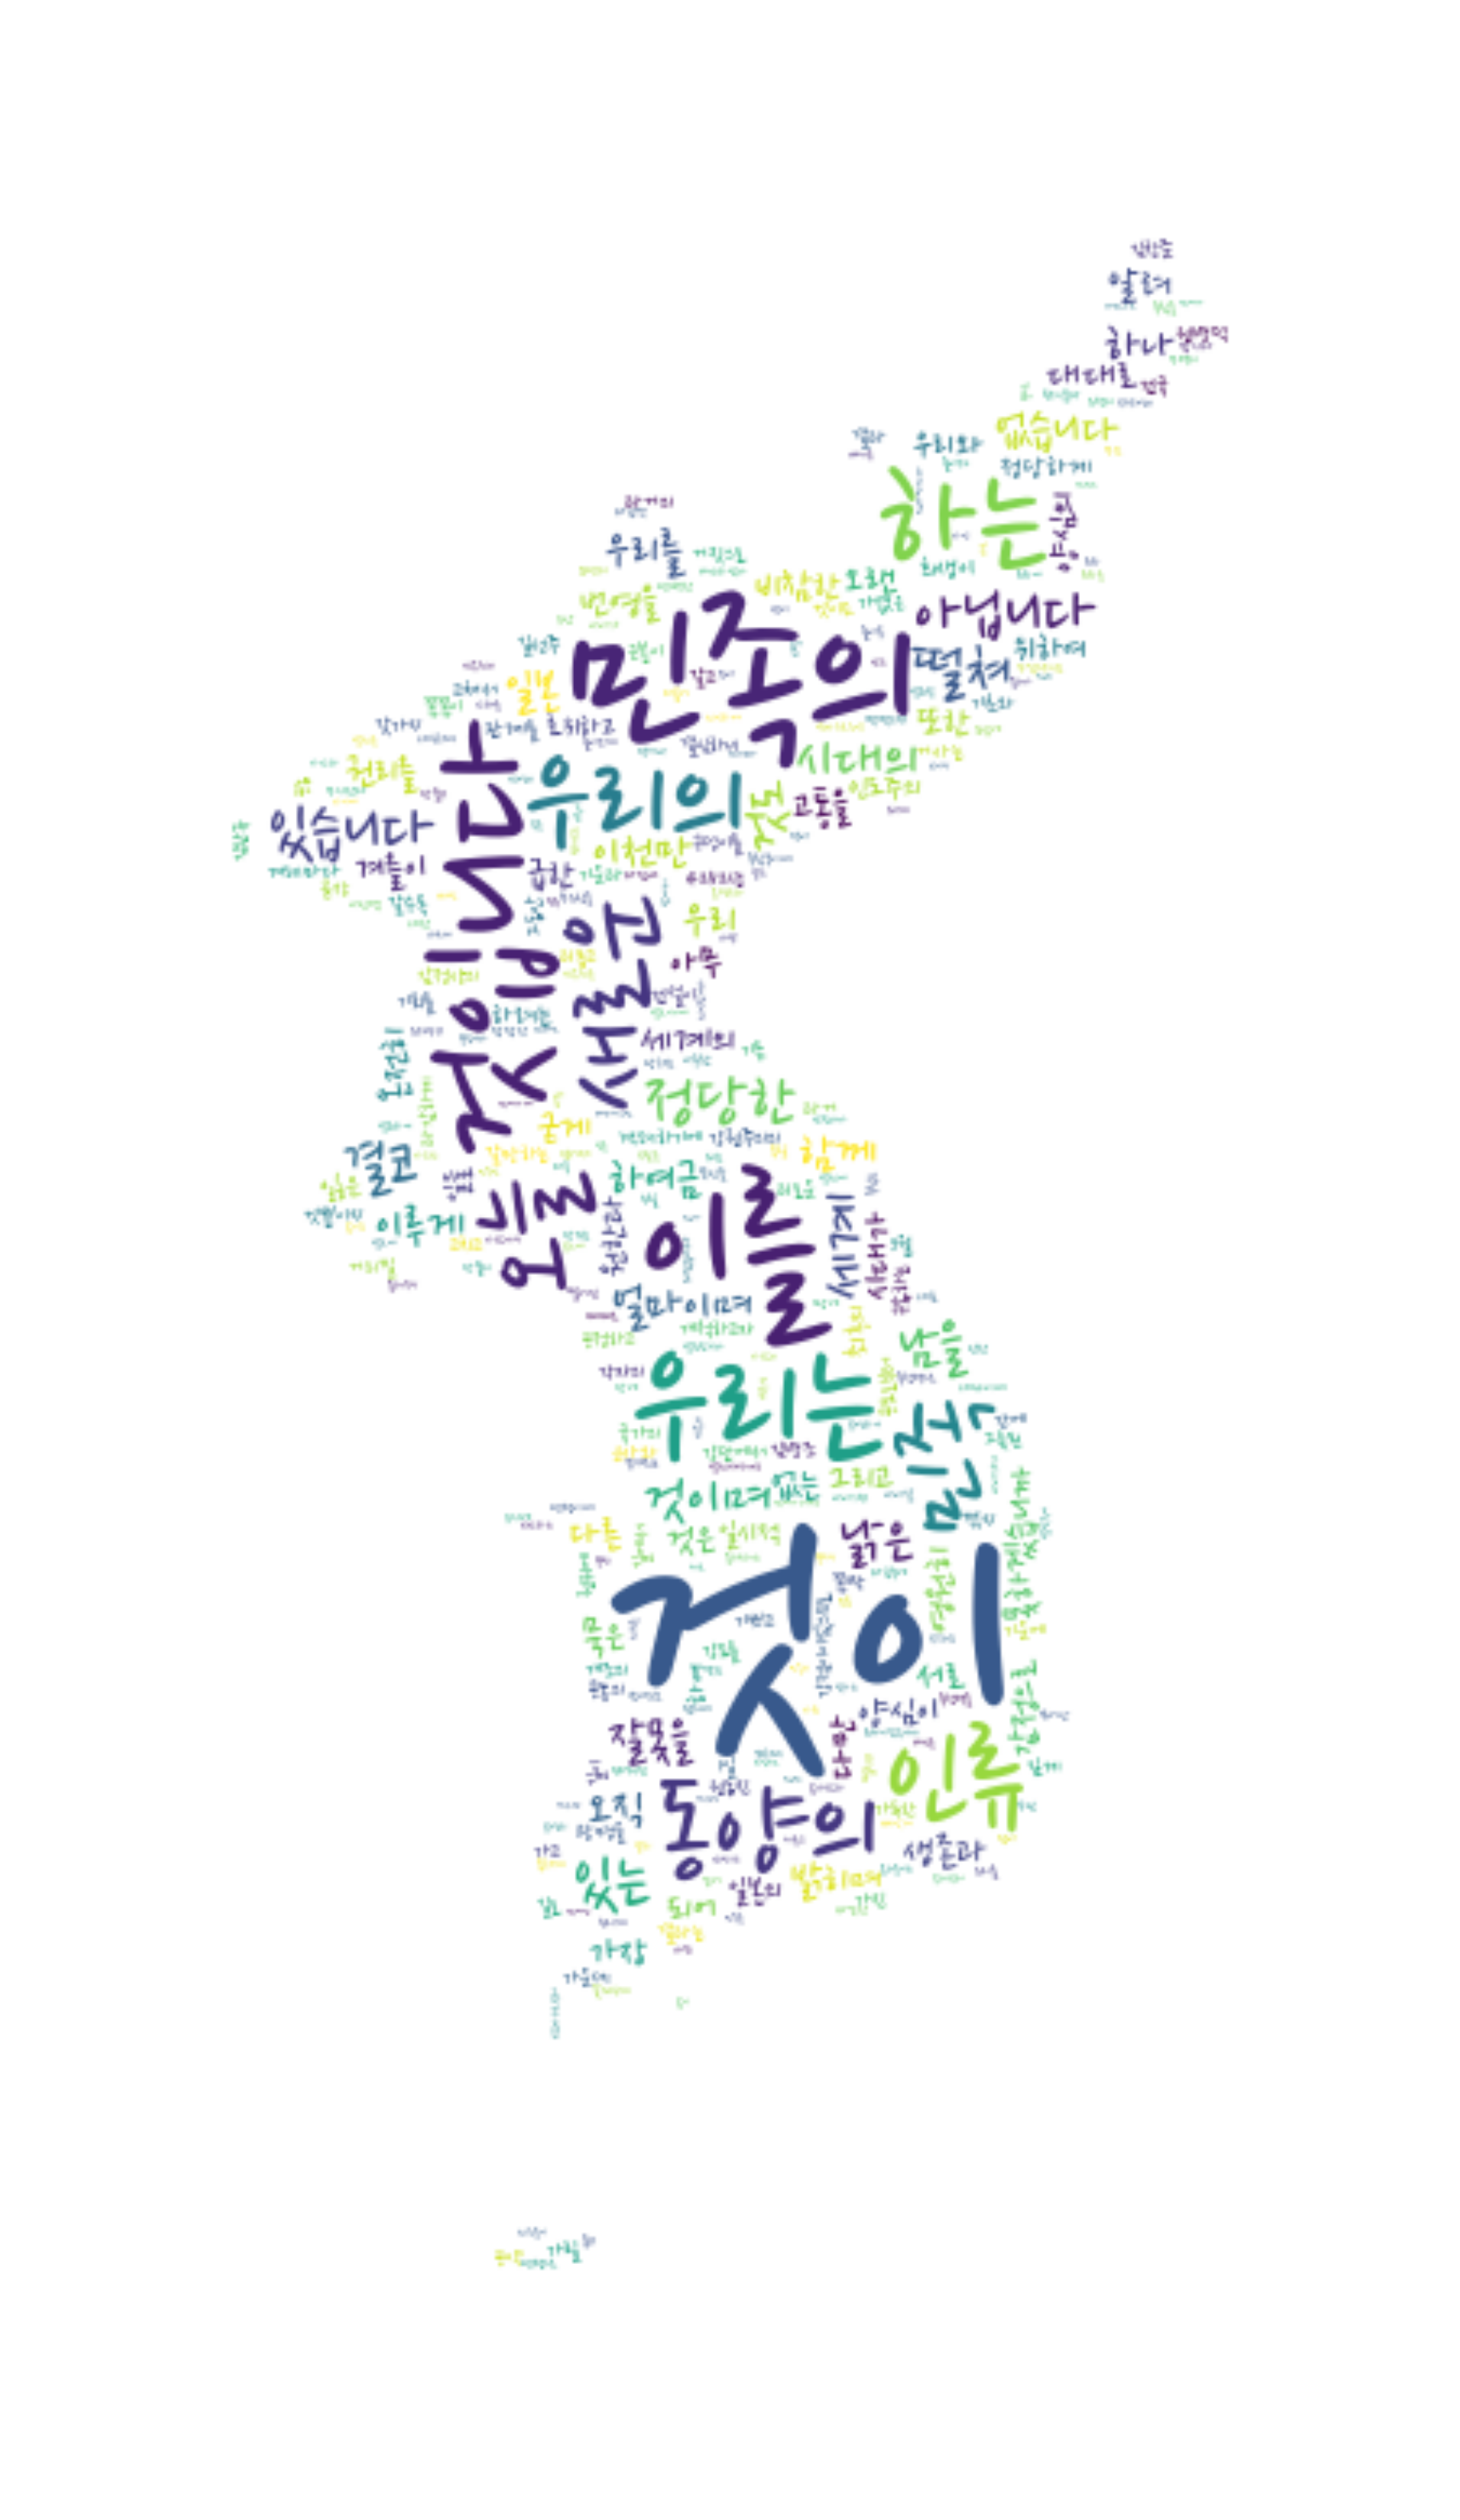

In [20]:
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()